In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘data.table’ was built under R version 4.2.3”


In [2]:
strats = fread('stratified_genome_metadata.tsv')
setnames(strats, 'genome_ID', 'genome')

In [3]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'coverm', 'sourmash', 'kaiju', 'map2b')
# Tools that do not have the correct taxonomy are tested only at the domain level. eg. Kaiju has NCBI taxonomy and MAP2B uses GTDB v202
correct_taxonomy_tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'coverm', 'sourmash')

In [4]:
d1 = data.table(expand.grid(tool=tools, genome=strats$genome))
d1[, method := 'relabund']
d1[tool=='kraken', method := 'reads_wise']
d1[tool=='kaiju', method := 'reads_wise']
d1[1:3]

tool,genome,method
<fct>,<fct>,<chr>
singlem,GCA_019422935.1_genomic,relabund
metaphlan,GCA_019422935.1_genomic,relabund
motus,GCA_019422935.1_genomic,relabund


In [5]:
# output_singlem/opal/GCA_022615805.1_genomic.opal_report
d2 = d1[, fread(paste('output_',tool,sep='','/opal/',genome,'.',method,'.opal_report')), by=list(tool,genome)]
d2[1:3]

tool,genome,tool,rank,metric,sample,value
<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,Gold standard,kingdom,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,phylum,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,class,Bray-Curtis distance,SAMPLEID,0


In [6]:
dim(d2)

[1] 173829      7

In [7]:
setnames(d2, c('tool','genome','blah','rank','metric','sample','value'))
d3 = d2[blah != 'Gold standard'][,.(tool, genome, rank, metric, value)]
d3[1:3]
dim(d3)

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.04432133
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03915592
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03802817


[1] 86469     5

In [8]:
bc = d3[metric=='Bray-Curtis distance']
dim(bc)
bc[1:10]

[1] 6720    5

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.04432133
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03915592
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03802817
singlem,GCA_019422935.1_genomic,order,Bray-Curtis distance,0.03802817
singlem,GCA_019422935.1_genomic,family,Bray-Curtis distance,0.03689777
singlem,GCA_019422935.1_genomic,genus,Bray-Curtis distance,0.03576471
singlem,GCA_019422935.1_genomic,species,Bray-Curtis distance,0.47655872
metaphlan,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.11514890
metaphlan,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.11514890


In [9]:
bc2 = merge(bc, strats, by='genome')
bc2[1:10]

genome,tool,rank,metric,value,novelty_category,taxonomy
<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.00296496,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.40992000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.39973958,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,order,Bray-Curtis distance,0.37828726,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,family,Bray-Curtis distance,0.33597407,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,genus,Bray-Curtis distance,0.33597407,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,species,Bray-Curtis distance,0.33597407,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,kingdom,Bray-Curtis distance,0.50000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,phylum,Bray-Curtis distance,0.50000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095


In [10]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novel_orders = gsub('^','novel ',orders)
bc2[, rank := factor(rank, levels=orders)]
bc2[, novelty_category := factor(novelty_category, levels=orders)]

In [11]:
bc2[, kingdom := gsub('d__', 'novel ', gsub(';.*','',taxonomy))]
bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]
bc2[1:3]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.00296496,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.40992000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.39973958,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


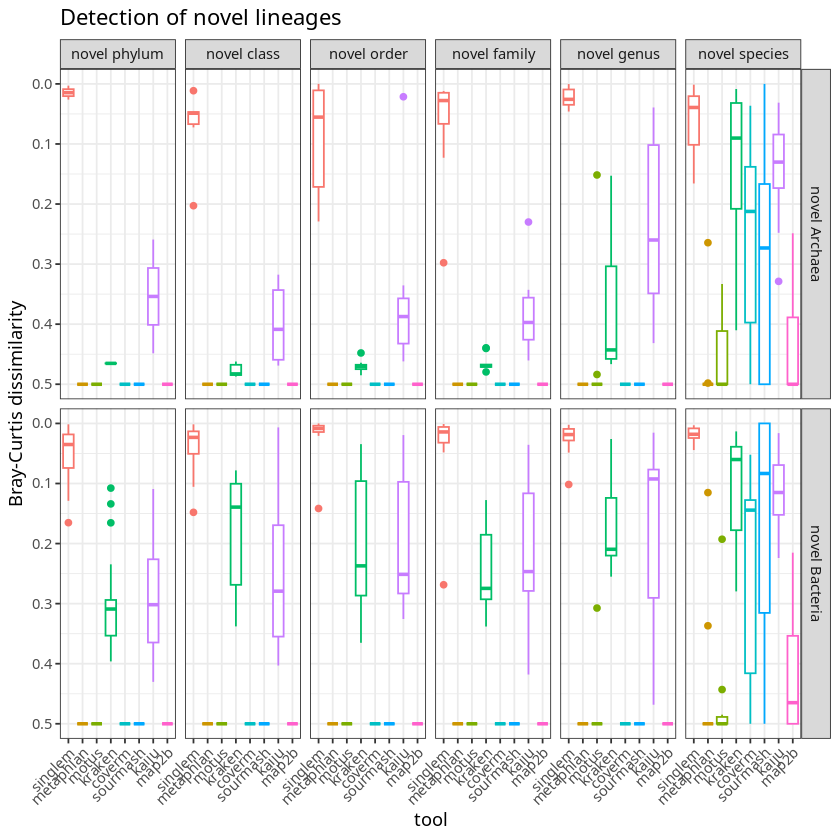

In [12]:
qplot(data=bc2[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [13]:
# stats
bc2[rank=='kingdom', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.04495185,0.05814123
metaphlan,0.49345336,0.04349317
motus,0.48845628,0.04984251
kraken,0.27960472,0.15296201
coverm,0.45775156,0.11774270
sourmash,0.45527921,0.13084612
kaiju,0.25165834,0.13653983
map2b,0.48836986,0.04776870


In [14]:
bc2[rank=='kingdom' & kingdom=='novel Archaea', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.05809113,0.06995840
metaphlan,0.49505016,0.03400395
motus,0.48305776,0.05886653
kraken,0.38191544,0.15352905
coverm,0.44978182,0.12404620
sourmash,0.45582562,0.12493234
kaiju,0.29890993,0.14297949
map2b,0.48836996,0.04699890


In [15]:
bc2[rank=='kingdom' & kingdom=='novel Bacteria', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03619233,0.04723782
metaphlan,0.49238883,0.04901256
motus,0.49205529,0.04286068
kraken,0.21139757,0.10870844
coverm,0.46306472,0.11392152
sourmash,0.45491494,0.13550948
kaiju,0.22015729,0.12328187
map2b,0.48836980,0.04860328


In [16]:
bc2[rank=='kingdom' & novelty_category=='species', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03898251,0.04526928
metaphlan,0.46072015,0.10244175
motus,0.45859995,0.07900916
kraken,0.12540864,0.11964593
coverm,0.24650934,0.17453388
sourmash,0.23167528,0.20993671
kaiju,0.13012904,0.07909251
map2b,0.43021917,0.10010097


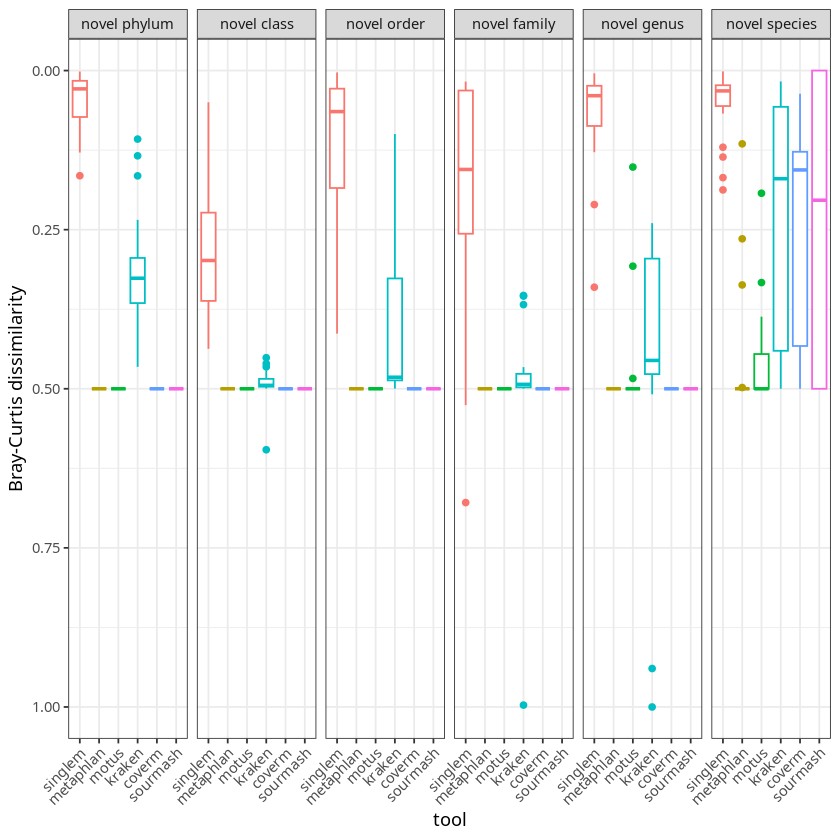

In [17]:
# What about when the rank equals the novelty category?
qplot(data=bc2[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]], ylab='Bray-Curtis dissimilarity', tool, colour=tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [18]:
# stats
bc2[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.1273573,0.13806539
metaphlan,0.4934534,0.04349317
motus,0.4886374,0.04964722
kraken,0.3972279,0.16879398
coverm,0.4577516,0.11774270
sourmash,0.4552792,0.13084612


In [19]:
bc2[tool %in% correct_taxonomy_tools][tool != 'singlem'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)][,.(ave=mean(ave), sd=mean(sd))]

ave,sd
<dbl>,<dbl>
0.4584699,0.1021046


In [20]:
bc2[tool == 'singlem' & novelty_category_novel=='novel class'][rank==orders[as.numeric(novelty_category)-1]][order(-value)]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_024720975.1_genomic,singlem,phylum,Bray-Curtis distance,0.43734257,class,d__Archaea;p__Thermoproteota;c__JANJXX01;o__JANJXX01;f__JANJXX01;g__JANJXX01;s__JANJXX01 sp024720975,novel Archaea,novel class
GCA_021163045.1_genomic,singlem,phylum,Bray-Curtis distance,0.43068331,class,d__Archaea;p__Thermoproteota;c__JANJXX01;o__JANJXX01;f__JANJXX01;g__JAGGXM01;s__JAGGXM01 sp021163045,novel Archaea,novel class
GCA_023475165.1_genomic,singlem,phylum,Bray-Curtis distance,0.38217338,class,d__Bacteria;p__Bacillota_E;c__JAMCWA01;o__JAMCWA01;f__JAMCWA01;g__JAMCWA01;s__JAMCWA01 sp023475165,novel Bacteria,novel class
GCA_021803575.1_genomic,singlem,phylum,Bray-Curtis distance,0.37633411,class,d__Bacteria;p__Bacillota_E;c__JAJZYS01;o__JAJZYS01;f__JAJZLH01;g__JAJZLH01;s__JAJZLH01 sp021803575,novel Bacteria,novel class
GCA_022072165.1_genomic,singlem,phylum,Bray-Curtis distance,0.37418591,class,d__Bacteria;p__4484-113;c__JAJVIF01;o__JAJVIF01;f__JAJVIF01;g__JAJVIF01;s__JAJVIF01 sp022072165,novel Bacteria,novel class
GCA_021791495.1_genomic,singlem,phylum,Bray-Curtis distance,0.35785737,class,d__Bacteria;p__Bacillota_E;c__JAJYWN01;o__JAJYWN01;f__JAJYWN01;g__JAJYWN01;s__JAJYWN01 sp021791495,novel Bacteria,novel class
GCA_022763185.1_genomic,singlem,phylum,Bray-Curtis distance,0.35378835,class,d__Bacteria;p__Bdellovibrionota;c__JALEGL01;o__JALEGL01;f__JALEGL01;g__JALEGL01;s__JALEGL01 sp022763185,novel Bacteria,novel class
GCA_021811325.1_genomic,singlem,phylum,Bray-Curtis distance,0.34263566,class,d__Bacteria;p__Bacillota_E;c__JAJYWN01;o__JAJYWN01;f__JAJZPE01;g__JAJZPE01;s__JAJZPE01 sp021811325,novel Bacteria,novel class
GCA_021162905.1_genomic,singlem,phylum,Bray-Curtis distance,0.33560754,class,d__Archaea;p__Asgardarchaeota;c__JAGGXT01;o__JAGGXT01;f__JAGGXT01;g__JAGGXT01;s__JAGGXT01 sp021162905,novel Archaea,novel class


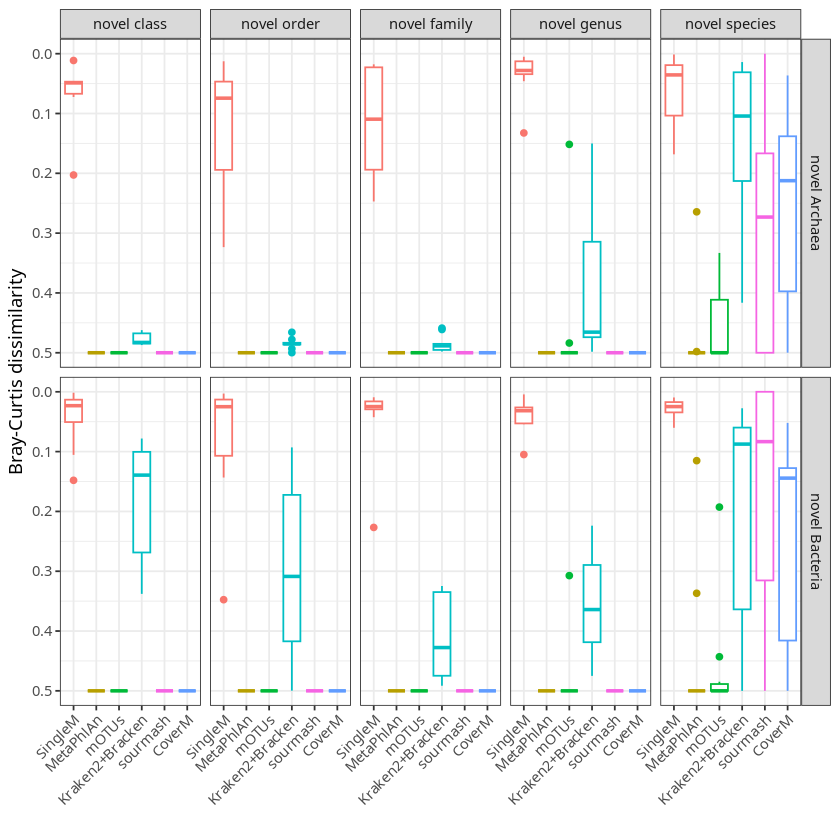

In [21]:
# What about when the rank equals one level above the novelty category?
bc2[tool=='singlem', tool2 := 'SingleM']
bc2[tool=='metaphlan', tool2 := 'MetaPhlAn']
bc2[tool=='motus', tool2 := 'mOTUs']
bc2[tool=='kraken', tool2 := 'Kraken2+Bracken']
bc2[tool=='sourmash', tool2 := 'sourmash']
bc2[tool=='kaiju', tool2 := 'Kaiju']
bc2[tool=='coverm', tool2 := 'CoverM']
tools2_order = c('SingleM','MetaPhlAn','mOTUs','Kraken2+Bracken','sourmash','Kaiju','CoverM')
bc2[, tool2 := factor(tool2, levels=tools2_order)]

bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]

qplot(data=bc2[tool %in% correct_taxonomy_tools][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]], colour=tool, ylab='Bray-Curtis dissimilarity', tool2, value, geom='boxplot', xlab='')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [22]:
bc2[tool %in% correct_taxonomy_tools][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.06153197,0.07152977
metaphlan,0.49214403,0.04757540
motus,0.48614753,0.05434928
kraken,0.33071294,0.16392154
coverm,0.44930187,0.12740216
sourmash,0.44633506,0.14175543


In [23]:
# Write out data for plotting benchmarks altogether
fwrite(bc2, 'bray_curtis.tsv', sep='\t')

# How much does SingleM over-classify to the species level?

In [24]:
# Read in the singlem .profile file for each species
profiles = data.table(expand.grid(tool=tools, genome=strats$genome))
profiles2 = profiles[, fread(paste('output_',tool,'/',tool,'/',genome,'.profile',sep=''), sep='\t',colClasses=c('character','numeric','character')), by=.(tool,genome)]
profiles2[1:3]

tool,genome,sample,coverage,taxonomy
<fct>,<fct>,<chr>,<dbl>,<chr>
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.46,Root; d__Archaea
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.21,Root; d__Bacteria
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.05,Root; d__Archaea; p__Halobacteriota


In [25]:
# Only care about s__ entries. Then order by abundance reverse, remove the top one.
get_abundance_of_non_top_species = function(sd) {
    # sd[, is_non_novel := F]
    # sd[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
    # sd[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]
    return(sd[is_non_novel==F, sum(coverage)] / sum(sd$coverage) * 2)
    # print(sd)
    # if (nrow(sd) == 1) {
    #     return(0)
    # } else {
    #     return(sd[2:nrow(sd), sum(coverage)] / sum(sd$coverage[1]))
    # }
}
profiles2[, is_non_novel := F]

# Read genome_pairs.tsv and extract
genome_pairs = fread('genome_pairs.tsv',sep='\t')
for (tax in genome_pairs$paired_taxonomy){
    profiles2[grep(gsub('.*;','',tax), taxonomy), is_non_novel := T]
}
# profiles2[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
# profiles2[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]

overclassification_rates = profiles2[grep('s__',taxonomy)][order(-coverage)][,.(overclassification=get_abundance_of_non_top_species(.SD)), by=.(tool,genome)]
summary(overclassification_rates[tool=='singlem']$overclassification)

overclassification_rates[tool=='singlem'][overclassification > 0.3]
table(overclassification_rates$tool)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05356 0.00000 0.86613 

tool,genome,overclassification
<fct>,<fct>,<dbl>
singlem,GCA_019422935.1_genomic,0.8661258
singlem,GCA_020053305.1_genomic,0.4573991
singlem,GCA_020161365.1_genomic,0.7220447
singlem,GCA_020860125.1_genomic,0.5491071
singlem,GCA_019459085.1_genomic,0.6916549
singlem,GCA_022678445.1_genomic,0.6101426
singlem,GCF_021184045.1_genomic,0.8276334
singlem,GCF_024707485.1_genomic,0.8000000
singlem,GCA_023379805.1_genomic,0.5462555



  singlem metaphlan     motus    kraken    coverm  sourmash     kaiju     map2b 
      120       120       113       120       120       120       120       120 

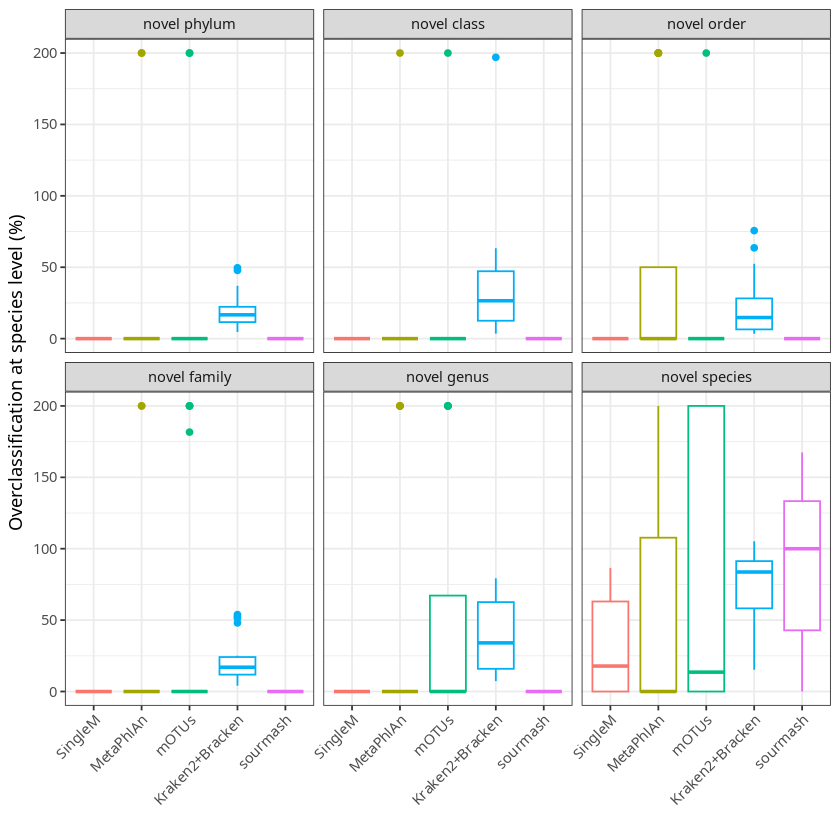

In [32]:
# What about per-taxon level?
overclassification_rates2 = merge(overclassification_rates, strats, by='genome')

overclassification_rates2[tool=='singlem', tool2 := 'SingleM']
overclassification_rates2[tool=='metaphlan', tool2 := 'MetaPhlAn']
overclassification_rates2[tool=='motus', tool2 := 'mOTUs']
overclassification_rates2[tool=='kraken', tool2 := 'Kraken2+Bracken']
overclassification_rates2[tool=='sourmash', tool2 := 'sourmash']
overclassification_rates2[tool=='kaiju', tool2 := 'Kaiju']
overclassification_rates2[tool=='coverm', tool2 := 'CoverM']
overclassification_rates2[tool=='map2b', tool2 := 'MAP2B']
tools2_order = c('SingleM','MetaPhlAn','mOTUs','Kraken2+Bracken','sourmash','Kaiju','CoverM')
overclassification_rates2[, tool2 := factor(tool2, levels=tools2_order)]

overclassification_rates2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]

qplot(data=overclassification_rates2[tool %in% correct_taxonomy_tools][tool != 'coverm'], tool2, overclassification*100, ylab='Overclassification at species level (%)', xlab='', geom='boxplot', colour=tool2)+facet_wrap(~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')

In [30]:
# So at the novel species level
summary(overclassification_rates2[tool=='singlem'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='metaphlan'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='motus'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='kraken'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='sourmash'][novelty_category=='species', overclassification])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.1783  0.3214  0.6305  0.8661 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.5786  1.0773  2.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.1357  0.7685  2.0000  2.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1528  0.5824  0.8369  0.7204  0.9132  1.0521 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4286  1.0000  0.8753  1.3333  1.6744 